In [91]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

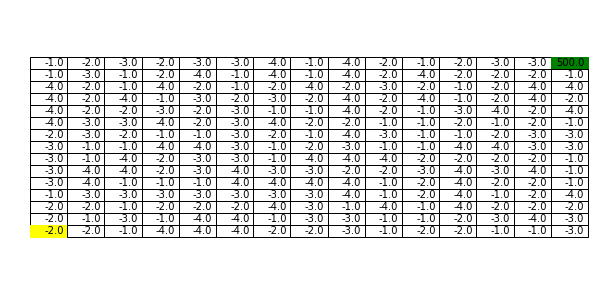

In [92]:
iterasi = 0 
state = 100
# Up,Right,Down,Left
action = 4 

# Matrix R
R_Tab = np.loadtxt('DataTugas3ML2019.txt').reshape(15*15) 


# Matrix Q
Q_Tab = np.zeros((15*15, action)) 

# jumlah episode
episode = 1000 

#total reward agent dari awal (start)
totalreward = 0 

decision = 0 

# visualisasi data (R_Tab)
data = np.loadtxt('DataTugas3ML2019.txt')
plt.figure(figsize=(10,5))
plt.axis('off')
table = plt.table(cellText=data,loc = 'center', fontsize = 5)
table.get_celld()[14,0].set_color('yellow')
table.get_celld()[0,14].set_color('green')
plt.show()

In [93]:
# Rumus
def rumus(initialroom,chooseaction,nextroom): 
    Q_Tab[initialroom][chooseaction] = 0.1 * Q_Tab[initialroom][chooseaction] + 0.9 * (R_Tab[nextroom] + 0.9 * max(Q_Tab[nextroom]))

In [94]:
# melakukan aksi selanjutnya
def nextaction(initialroom,chooseaction):
    if chooseaction==0: #Agent melakukan Up (keatas)
        nextroom = (initialroom//15-1)*15 + (initialroom%15)
    elif chooseaction==1: #Agent melakukan Right (ke Kanan)
        nextroom = (initialroom//15)*15 + (initialroom%15+1)
    elif chooseaction==2: #Agent melakukan down (kebawah)
        nextroom = (initialroom//15+1)*15 + (initialroom%15)
    else: #Agent melakukan Left (ke Kiri)
        nextroom = (initialroom//15)*15 + (initialroom%15-1)
    return nextroom


In [95]:
# aksi yang dapat dilakukan dalam suatu state 0 : Up, 1 : Right, 2: Down, 3: Left dan me random aksi yang dilakukan
def possibleAction(initialroom):
    y, x = (initialroom//15), (initialroom%15)
    if((y, x) == (0, 0)):
        return random.choice([1, 2]) # Right Down
    elif((y, x) == (0, 14)):
        return random.choice([3, 2]) # Left Down
    elif((y, x) == (14, 14)):
        return random.choice([3, 0]) # Left Up
    elif((y, x) == (14, 0)):
        return random.choice([0, 1]) # Up Right
    elif(x == 0):
        return random.choice([1, 0, 2]) # Right Down
    elif(x == 14):
        return random.choice([0, 2, 3]) # Up Down Left
    elif(y == 0):
        return random.choice([2, 3, 1]) # Right Left Down
    elif(y == 14):
        return random.choice([3, 0, 1]) # Left Up Right
    else:
        return random.choice([0, 1, 2, 3]) # atas kanan bawah kiri Up Righ Down Left



In [96]:
# fungsi untuk melakukan testing akan dijalankan setelah melakukan learning
def Testing():
    initialroom = 15*14 + 0 # start
    max_step = 15*15-1 # max pergerakan / step yg dilakukan -1 karena dikurangi cell goal
    s = 0
    step = []
    totalreward = 0
    stepxy = [(14, 0)]
    while initialroom != 14 and s <= max_step: #ketika agent belum mencapai goal atau step belum step max step
        decision = np.argmax(Q_Tab[initialroom]) #untuk mendapatkan aksi apa yang diperlukan oleh agen
        step.append(decision)
        # print("Max : ",Q_Tab[initialroom][decision])
        nextroom = nextaction(initialroom,decision)
        totalreward = totalreward + R_Tab[nextroom]
        # print("Nextroom : ",nextroom)
        initialroom = nextroom
        stepxy.append((nextroom//15, nextroom%15))
        s += 1
        # print("===============================================")
    print("Total Reward : ",totalreward)
    print("Step : ",step)
    print("Keterangan :")
    print(" 0 : Up, 1 : Right, 2: Down, 3: Left")
    # tampilkan
    plt.figure(figsize=(20,5))
    plt.axis('off')
    table = plt.table(cellText=R.reshape(15, 15),loc='center', fontsize=1)
    
    for s in stepxy:
        table.get_celld()[s].set_color('blue')
    plt.show()


In [97]:
nextroom = 0
max_step = 30
#learning
for i in range(episode):
    initialroom = random.randint(0, 15*15-1) #random initial state setiap episode
    step = 0
    while initialroom != 15 or step <= max_step: #ketika agent belum mencapai goal atau belum mencapai max step
        lock = 0
        chooseaction = possibleAction(initialroom) #random aksi
        nextroom = nextaction(initialroom, chooseaction)
        rumus(initialroom, chooseaction, nextroom)
        initialroom = nextroom
        step += 1
        

Total Reward :  455.0
Step :  [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
Keterangan :
 0 : Up, 1 : Right, 2: Down, 3: Left


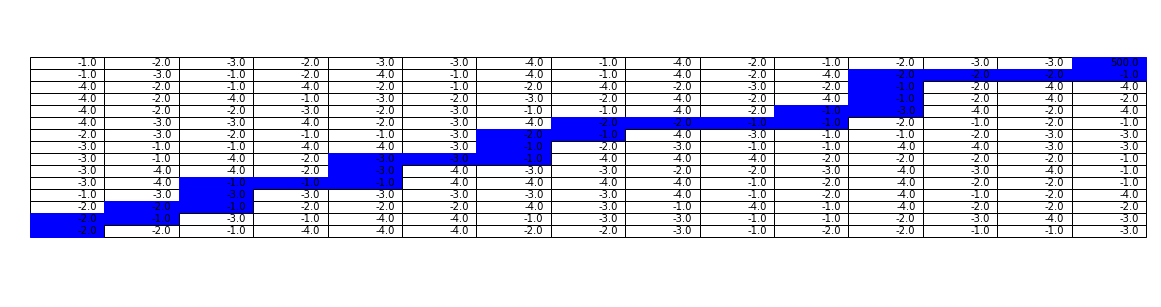

In [98]:
Testing()